<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-Equipo42/blob/main/Reto1_aguas_superficiales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#obtener la informacion
import pandas as pd
import numpy as np

df = pd.read_csv('/content/sample_data/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv', encoding = "ISO-8859-1")
print(df['CALIDAD_TOX_FIS_FON_15'].isna().sum())
#como la columna CALIDAD_TOX_FIS_FON_15 no presenta valores la borramos
df = df.drop(['CALIDAD_TOX_FIS_FON_15'], axis=1)
#borramos TOX_FIS_FON_15_UT
print(df['TOX_FIS_FON_15_UT'].isna().sum())
df = df.drop(['TOX_FIS_FON_15_UT'], axis=1)
#borramos columna CALIDAD_TOX_D_48_FON
df = df.drop(['CALIDAD_TOX_D_48_FON'], axis=1)
#borramos la columna TOX_D_48_FON_UT
df = df.drop(['TOX_D_48_FON_UT'], axis=1)
df.shape
#nos quedamos con 51 features


4141
4141


(4141, 51)

In [2]:
# CALIDAD DBO Mapping 
df.CALIDAD_DBO.fillna(value=df.CALIDAD_DBO.mode()[0], inplace=True)
df['calidadDBOEncoded'] = df['CALIDAD_DBO'].map( {'Excelente': 1, 
                                        'Buena calidad': 2,
                                        'Aceptable': 3, 
                                        'Contaminada': 4, 
                                        'Fuertemente contaminada': 5, 
                                        '':0} ).astype(int)
 



In [3]:
#calidad DQO mapping
df.CALIDAD_DQO.fillna(value=df.CALIDAD_DQO.mode()[0], inplace=True) 
df['calidadDQOEncoded'] = df['CALIDAD_DQO'].map( {'Excelente': 1, 
                                        'Buena calidad': 2,
                                        'Aceptable': 3, 
                                        'Contaminada': 4, 
                                        'Fuertemente contaminada': 5, 
                                        '':0} ).astype(int)

In [4]:
#calidad SST mapping
df.CALIDAD_SST.fillna(value=df.CALIDAD_SST.mode()[0], inplace=True) 
df['calidadSSTEncoded'] = df['CALIDAD_SST'].map( {'Excelente': 1, 
                                        'Buena calidad': 2,
                                        'Aceptable': 3, 
                                        'Contaminada': 4, 
                                        'Fuertemente contaminada': 5, 
                                        '':0} ).astype(int)

In [5]:
#CALIDAD_COLI_FEC mapping
df.CALIDAD_COLI_FEC.fillna(value=df.CALIDAD_COLI_FEC.mode()[0], inplace=True) 
df['calidadCOLI_FECEncoded'] = df['CALIDAD_COLI_FEC'].map( {'Excelente': 1, 
                                        'Buena calidad': 2,
                                        'Aceptable': 3, 
                                        'Contaminada': 4, 
                                        'Fuertemente contaminada': 5, 
                                        '':0} ).astype(int)
                                        

In [6]:
#CALIDAD_E_COLI mapping
df.CALIDAD_E_COLI.fillna(value=df.CALIDAD_E_COLI.mode()[0], inplace=True) 
df['calidadE_COLIEncoded'] = df['CALIDAD_E_COLI'].map( {'Excelente': 1, 
                                        'Buena calidad': 2,
                                        'Aceptable': 3, 
                                        'Contaminada': 4, 
                                        'Fuertemente contaminada': 5, 
                                        '':0} ).astype(int)

In [7]:
#CALIDAD_ENTEROC mapping
df.CALIDAD_ENTEROC.fillna(value=df.CALIDAD_ENTEROC.mode()[0], inplace=True)
df['calidadENTEROCEncoded'] = df['CALIDAD_ENTEROC'].map( {'Excelente': 1, 
                                        'Buena calidad': 2,
                                        'Aceptable': 3, 
                                        'Contaminada': 4, 
                                        'Fuertemente contaminada': 5, 
                                        '':0} ).astype(int)

In [8]:
#CALIDAD_TOX_D_48 mapping
df.CALIDAD_TOX_D_48.fillna(value=df.CALIDAD_TOX_D_48.mode()[0], inplace=True)
df['calidadTOXDEncoded'] = df['CALIDAD_TOX_D_48'].map( {'No Toxico': 1, 
                                        'Toxicidad baja': 2,
                                        'Toxicidad moderada': 3, 
                                        'Toxicidad alta': 4, 
                                        '':0} ).astype(int)


In [9]:
#semaforo mapping
df.SEMAFORO.fillna(value=df.SEMAFORO.mode()[0], inplace=True)
df['semaforoEncoded'] = df['SEMAFORO'].map( {'Verde': 1, 
                                        'Amarillo': 2,
                                        'Rojo': 3,  
                                        '':0} ).astype(int)

In [10]:
#borramos 648 rows porque son filas que no tienen valor
df.dropna(subset=['LONGITUD'], inplace = True)
df.describe()


,LONGITUD,LATITUD,PERIODO,calidadDBOEncoded,calidadDQOEncoded,calidadSSTEncoded,calidadCOLI_FECEncoded,calidadE_COLIEncoded,calidadENTEROCEncoded,calidadTOXDEncoded,semaforoEncoded
count,3493.000000,3493.000000,3493.0,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000
mean,-100.359969,21.046992,2020.0,1.718007,3.116519,1.843974,3.989407,3.470083,1.174635,1.042084,1.949614
std,6.122773,3.893696,0.0,1.068828,1.186935,1.113281,1.334687,1.812054,0.772055,0.277452,0.820194
min,-117.124030,14.534910,2020.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,-103.882310,18.396070,2020.0,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000
50%,-99.795530,20.148980,2020.0,1.000000,4.000000,1.000000,5.000000,5.000000,1.000000,1.000000,2.000000
75%,-96.860230,22.828930,2020.0,3.000000,4.000000,2.000000,5.000000,5.000000,1.000000,1.000000,3.000000
max,-86.732150,32.706500,2020.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000


**variable DBO**: tiene un valor maximo de 5 (agua fuertemente contaminada) y un valor minimo de 1 (agua en excelente estado). Ademas en promedio se tiene un valor de 1.71  lo cual significa que la mayoria de los municipios tienen agua en buen estado. La mediana de esta variable es de 1.

**variable DQO**: Tiene un valor maximo de 5 y un valor minimo de 1. En promedio esta variable muestra un 3.11 lo que significa que la calidad del agua es aceptable. La mediana de esta variable es de 4.

**variable SST**: Tiene un valor maximo de 5 mientras que el valor minimo equivale a 1. El promedio es de 1.84 por lo que se puede decir que la calidad del agua es buena. La mediana de esta variable es de 1.

**variable COLI_FEC**: Tiene un valor maximo de 5 y un valor minimo de 1. En promedio esta variable present un valor de 3.98 por lo que podemos afirmar que el agua no present un estado aceptable. La mediana de esta variable es de 5.

**variable E_coli**: Tiene un valor maximo de 5 y un valor minimo de 1. En promedio la calidad del agua es de 3.47(agua en estado aceptable). La mediana de esta variable es de 5.

**variable ENTOREC**: Tine un valor maximo de 5 y el valor minimo es 1. En promedio para esta variable la calidad del agua es de 1.17, por lo que podemos decir que tiene un estado excelente. La mediana de esta variable es de 5.





In [11]:
df.corr().round(2)

,LONGITUD,LATITUD,PERIODO,calidadDBOEncoded,calidadDQOEncoded,calidadSSTEncoded,calidadCOLI_FECEncoded,calidadE_COLIEncoded,calidadENTEROCEncoded,calidadTOXDEncoded,semaforoEncoded
LONGITUD,1.00,-0.71,NaN,0.03,0.03,-0.01,0.00,0.06,0.01,0.01,-0.02
LATITUD,-0.71,1.00,NaN,-0.06,-0.08,-0.13,-0.06,-0.14,-0.10,-0.01,-0.08
PERIODO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
calidadDBOEncoded,0.03,-0.06,NaN,1.00,0.38,0.32,-0.04,0.02,-0.15,0.29,0.56
calidadDQOEncoded,0.03,-0.08,NaN,0.38,1.00,0.22,0.29,0.41,0.17,0.17,0.31
calidadSSTEncoded,-0.01,-0.13,NaN,0.32,0.22,1.00,0.26,0.27,-0.04,0.12,0.36
calidadCOLI_FECEncoded,0.00,-0.06,NaN,-0.04,0.29,0.26,1.00,0.79,0.17,0.03,0.08
calidadE_COLIEncoded,0.06,-0.14,NaN,0.02,0.41,0.27,0.79,1.00,0.19,0.07,0.06
calidadENTEROCEncoded,0.01,-0.10,NaN,-0.15,0.17,-0.04,0.17,0.19,1.00,-0.03,0.25
calidadTOXDEncoded,0.01,-0.01,NaN,0.29,0.17,0.12,0.03,0.07,-0.03,1.00,0.17


Se puede ver una alta correlacion (0.79) entre la variable **calidadE_COLIEncoded** y **calidadCOLI_FECEncoded**. Podriamos reducir la dimensionalidad de las variables que usaremos al momento de aplicar k-means. 

([<matplotlib.axis.XTick at 0x7faaa16f5b10>,
 [Text(0, 0, 'DBO'),
  Text(0, 0, 'DQO'),
  Text(0, 0, 'SST'),
  Text(0, 0, 'COLI_FEC'),
  Text(0, 0, 'E_COLI')])

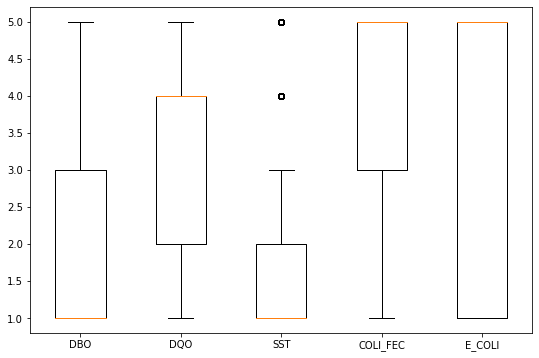

In [12]:
import matplotlib.pyplot as plt
one = df['calidadDBOEncoded']
two = df['calidadDQOEncoded']
three = df['calidadSSTEncoded']
four = df['calidadCOLI_FECEncoded']
five = df['calidadE_COLIEncoded']

to_plot=[one, two, three, four, five]
fig=plt.figure(1,figsize=(9,6))
ax=fig.add_subplot()
bp=ax.boxplot(to_plot)
plt.xticks([1, 2, 3, 4, 5], ['DBO', 'DQO', 'SST', 'COLI_FEC', 'E_COLI'])
# fig.savefig('boxplot.png',bbox_inches='tight')

En el grafico de BOXPLOT se puede ver que para **SST** existen **OUTLIERS** con valores que muestran el valor del agua contaminada y fuertemente contaminada. 

Para el caso de **COLI_FEC** el 50% de los datos tienen agua de baja calidad.

Para la variable **DQO**, el 25% de los datos tiene tiene agua de buena calidad, mientras que el otro 25% es agua contaminada.

Para **DBO** el 25% del agua va de calidad aceptable a fuertemente contamidanada. 

In [13]:
#import geopandas
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 5.0 MB/s 
     |████████████████████████████████| 1.0 MB 40.6 MB/s 
     |████████████████████████████████| 1.7 MB 39.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 63.7 MB/s 
     |████████████████████████████████| 6.3 MB 42.6 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=69ba87c9d56ef7363ac818998d131ee654d1f729182306399b9f7979e4c334a2
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=d84102a2b79a0a3a539e57f07bfbe98bd1f677e1a1b9f51b06ade3b3437e0e51
  Stored in directory: /root/.

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();
df["Coordinates"] = list(zip(df.LONGITUD, df.LATITUD))
df["Coordinates"] = df["Coordinates"].apply(Point)
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")

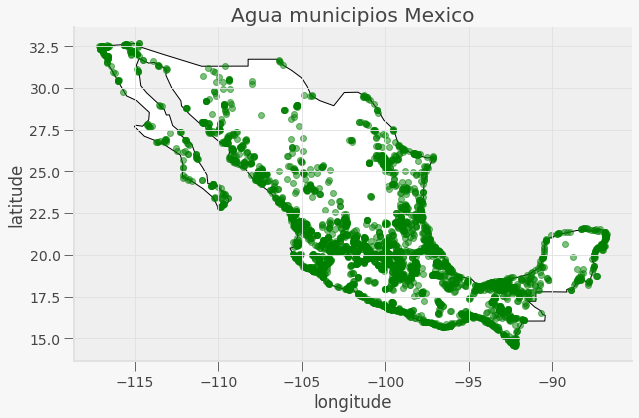

In [15]:
fig, gax = plt.subplots(figsize=(10,10))

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdf.plot(ax=gax, color='green', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Agua municipios Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

En el grafico de arriba se muestra todos los datos que se encuentran en diferentes regiones de mexico, para lograr esto usamos la libreria geopandas. 

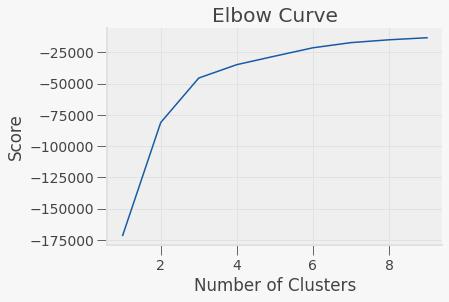

In [21]:
#primero determinamos un numero optimo de clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
#aplicamos el algoritmo de kmeans a las variables de latitud , longitud y la propiedad quimica DBO. 
X = np.array(gdf[["LATITUD","LONGITUD", "calidadDBOEncoded"]])
x_train, x_test = train_test_split(X, test_size=0.10, random_state=1)
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(x_train).score(x_train) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Basados en el principio del 'Codo' se puede ver que un buen numero de clusters es 4 ya que a partir de ese valor la grafica empieza a suavizarse. 

# New Section

In [28]:
#APLICAMOS el algoritmo de k-means
kmeans = KMeans(n_clusters=4).fit(x_train)
centroids = kmeans.cluster_centers_
print("los centroides muestran la latitud , longitud y la calidad del agua DQO")
print(centroids)

colors=['red','green','blue','brown']
labels = kmeans.predict(x_train)
asignar=[]
for row in labels:
    asignar.append(colors[row])

los centroides muestran la latitud , longitud y la calidad del agua DQO
[[  28.46860627 -111.71185625    1.3933162 ]
 [  19.4753948   -98.92375346    1.96169194]
 [  17.7824339   -92.15861558    1.45468998]
 [  22.45602149 -103.47331077    1.69495413]]


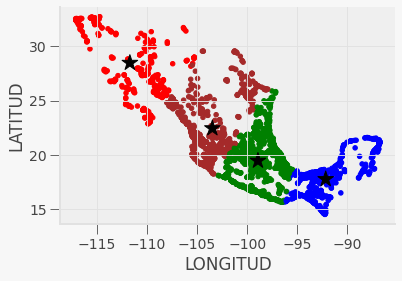

In [29]:
data = {'LATITUD':  centroids[:][:, 0],
        'LONGITUD': centroids[:][:, 1]}
dataFrame  = pd.DataFrame(data)
latlong=dataFrame[["LATITUD","LONGITUD"]]
f = x_train[:][:, 0]
f1 = x_train[:][:, 1]
data1 = {'LATITUD':  f,
        'LONGITUD': f1}
data1Frame = pd.DataFrame(data1)
l = data1Frame.plot.scatter( "LONGITUD","LATITUD", c=asignar)
latlong.plot.scatter("LONGITUD","LATITUD", c=['black', 'black', 'black', 'black'], ax=l, s= 270, marker= '*')

En el grafico se puede apreciar cuatro grupos claramente diferenciados a lo largo del territorio mexicano. El grupo azul tiene un valor de semaforo igual a 1.61, el grupo verde tiene un valor para el semaforo de 2.055. El grupo cafe tiene un valor de semaforo igual a 2.198 y finalmente el grupo rojo tiene un valor semaforo igual a 1.55.

Aplicando kmeans encontramos cuadro lugares importantes los cuales son: 

1. Texcoco Municipality, State of Mexico, Mexico (color rojo)

2. Macuspana Municipality, Tabasco, Mexico (color azul)

3. Monte Escobedo, Zacatecas, Mexico (color cafe)

4. El Cardonal, Sonora, Mexico (color verde)

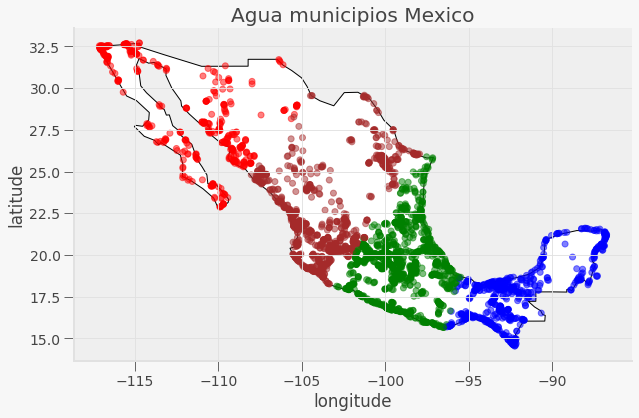

(3493, 60)

In [30]:
#dibujar los grupos en el mapa
data1Frame["Coordinates"] = list(zip(data1Frame.LONGITUD, data1Frame.LATITUD))
data1Frame["Coordinates"] = data1Frame["Coordinates"].apply(Point)
gdf1 = gpd.GeoDataFrame(data1Frame, geometry="Coordinates") 
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')
gdf1.plot(ax=gax, color=asignar, alpha = 0.5)
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Agua municipios Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()
gdf.shape

En este grafico se puede apreciar de mejor forma los 4 grupos que surgen al aplicar kmeans al grupo de datos de entrenamiento.

**PREDICCION**


In [67]:
new_labels = kmeans.predict(x_test)
newArr = new_labels[new_labels < 2]

print("grupo al que pertenece x_test pos 3 :::" , new_labels[3])
print("grupo al que pertenece x_test pos 5 :::" , new_labels[5])
print("grupo al que pertenece x_test pos 12 :::" , new_labels[12])
print("grupo al que pertenece x_test pos 65 :::" , new_labels[65])
print("grupo al que pertenece x_test pos 76 :::" , new_labels[76])
print(x_test[3], ' semaforo = rojo')#rojo
print(x_test[5], ' semaforo = rojo')#Rojo
print(x_test[12], ' semaforo = rojo')#Rojo
print(x_test[65], ' semaforo = verde')#Verde
print(x_test[76], ' semaforo = amarillo')#Amarillo


grupo al que pertenece x_test pos 3 ::: 1
grupo al que pertenece x_test pos 5 ::: 1
grupo al que pertenece x_test pos 12 ::: 1
grupo al que pertenece x_test pos 65 ::: 1
grupo al que pertenece x_test pos 76 ::: 1
[ 20.64148 -99.56632   2.     ]  semaforo = rojo
[ 25.65157 -98.03159   2.     ]  semaforo = rojo
[ 19.22803 -96.20357   3.     ]  semaforo = rojo
[ 16.85351 -99.86224   1.     ]  semaforo = verde
[ 21.39799 -99.58041   1.     ]  semaforo = amarillo


Para poder saber si podemos determinar la calidad del agua en base al centroide se ejecuto kmeans.predict con los datos de prueba x_test. El resultado para el grupo 1 (color verde en la grafica) muestra diferentes valores para la variable semaforo. Por ejemplo para el dato de test en la posicion 3 , el valor del semaforo es rojo mientras que el dato de test en la posicion 76 tiene como semaforo el color amarillo. Podemos concluir que con el algoritmo de kmeans se hizo un agrupamiento correcto de las latitudes y longitudes, **pero el tema del semaforo falla porque no podemos determinar en base a la region la calidad del agua**

